In [2]:
from skimage import io
import numpy as np
import numpy.matlib

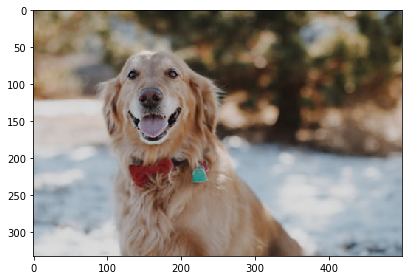

In [46]:
image = io.imread('HappyDog.jpeg')
io.imshow(image)
io.show()

In [47]:
rows = image.shape[0]
cols = image.shape[1]
image = image/255
X = image.reshape(image.shape[0]*image.shape[1],3)

In [60]:
k=32  # number of clusters
max_iters = 50

In [61]:
import random
def init_centroids(X,K):
    c = random.sample(list(X),K)
    return c

In [62]:
def closest_centroids(X,c):
    K = np.size(c,0)
    idx = np.zeros((np.size(X,0),1))
    arr = np.empty((np.size(X,0),1))
    for i in range(0,K):
        y = c[i]
        temp = np.ones((np.size(X,0),1))*y
        b = np.power(np.subtract(X,temp),2)
        a = np.sum(b,axis=1)
        a = np.asarray(a)
        a.resize((np.size(X,0),1))
        arr = np.append(arr,a,axis=1)
    arr = np.delete(arr,0,axis=1)
    idx = np.argmin(arr,axis=1)
    return idx

In [63]:
def compute_centroids(X,idx,K):
    n = np.size(X,1)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        ci = idx == i
        ci = ci.astype(int)
        total_number = sum(ci)
        ci.resize((np.size(X,0),1))
        total_matrix = np.matlib.repmat(ci,1,n)
        ci = np.transpose(ci)
        total = np.multiply(X,total_matrix)
        centroids[i] = (1/total_number)*np.sum(total,axis=0)
    return centroids

In [64]:
def run_kmean(X,initial_centroids,max_iters):
    m = np.size(X,0)
    n = np.size(X,1)
    K = np.size(initial_centroids,0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    for i in range(1,max_iters):
        idx = closest_centroids(X,centroids)
        centroids = compute_centroids(X,idx,K)
    return centroids,idx

In [65]:
initial_centroids = init_centroids(X,k)
centroids,idx = run_kmean(X,initial_centroids,max_iters)
print(np.shape(centroids))
print(np.shape(idx))

(32, 3)
(166500,)


In [66]:
idx = closest_centroids(X,centroids)
X_recovered = centroids[idx]
print(np.shape(X_recovered))
X_recovered = np.reshape(X_recovered,(rows,cols,3))
print(np.shape(X_recovered))

(166500, 3)
(333, 500, 3)


In [67]:
import imageio
imageio.imwrite('small.jpg',X_recovered)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


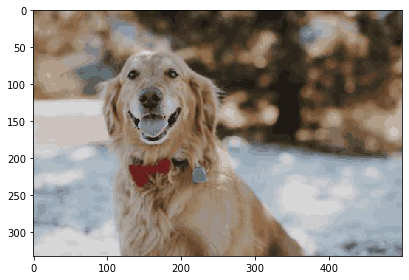

In [68]:
image_compressed = io.imread('small.jpg')
io.imshow(image_compressed)
io.show()

In [69]:
import os
info = os.stat('HappyDog.jpeg')
print("Size of image before running K-means algo ",info.st_size/1024,"KB")
info = os.stat('small.jpg')
print("Size of image after running K-means algo",info.st_size/1024,"KB")

Size of image before running K-means algo  22.9296875 KB
Size of image after running K-means algo 20.4873046875 KB
